
# Create a necktie plot


This example notebook demonstrates as a basic example how sphinx-nbexamples
works.


In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import apace as ap
import itertools

99


IndexError: index 99 is out of bounds for axis 0 with size 2

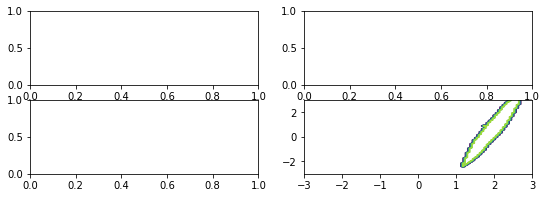

In [22]:
url = "https://raw.githubusercontent.com/NoBeam/lattices/master/b2_stduser_2019_05_07.json"
lattice = ap.Lattice.from_file(url)
twiss = ap.Twiss(lattice)
quads = "Q5T2", "Q4T2", "Q3T2"
combinations = list(itertools.combinations(quads, 2))
n_combinations = len(combinations)
fig, axs = plt.subplots(n_combinations // 2 + 1, 2, figsize=(9, 3))

for i, (name_1, name_2) in enumerate(combinations):
    q1 = lattice[name_1]
    q2 = lattice[name_2]
    q1_initial = q1.k1
    q2_initial = q2.k1
    n_steps = 100
    k1_start = -3
    k1_end = 3

    q1_values = np.linspace(k1_start, k1_end, n_steps)
    q2_values = np.linspace(k1_start, k1_end, n_steps)
    stable = np.empty((n_steps, n_steps), dtype=bool)

    for i, q1.k1 in enumerate(q1_values):
        for j, q2.k1  in enumerate(q2_values):
            stable[i, j] = twiss.stable
            
    q1.k1 = q1_initial
    q1.k2 = q2_initial
    print(i)
    x, y = np.meshgrid(q1_values, -q2_values)
    CS = plt.contour(x, y, stable)
    axs[i].xlabel(f'{q1.name} k1 / m$^{{-1}}$')
    axs[i].ylabel(f'{q2.name} -k1 / m$^{{-1}}$')
    
plt.show()